# **Street View Housing Number Digit Recognition**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Importing the necessary libraries**

In [ ]:
import h5py

import keras
import cv2

import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential, Model

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU, Input
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

In [ ]:
tf.version.VERSION

'2.15.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.

In [ ]:
path = "/content/drive/MyDrive/SVHN_single_grey1.h5"
data = h5py.File(path, 'r')

x_train = data['X_train'][:]
y_train = data['y_train'][:]

x_test = data['X_test'][:]
y_test = data['y_test'][:]

data.close()

In [ ]:
x_train.shape, x_test.shape

((42000, 32, 32), (18000, 32, 32))

**Observation:**

There are 42000 images in our training data and 18000 in our test data. Both also have 32 pixels along both the x and y axis

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

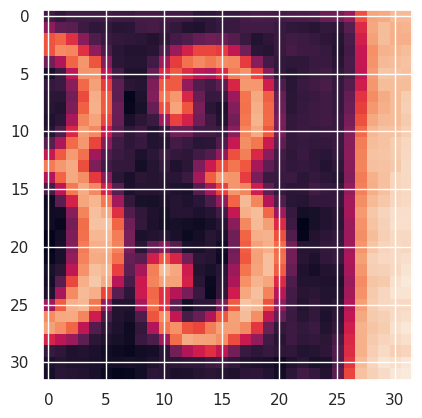

In [ ]:
plt.imshow(x_train[9]);

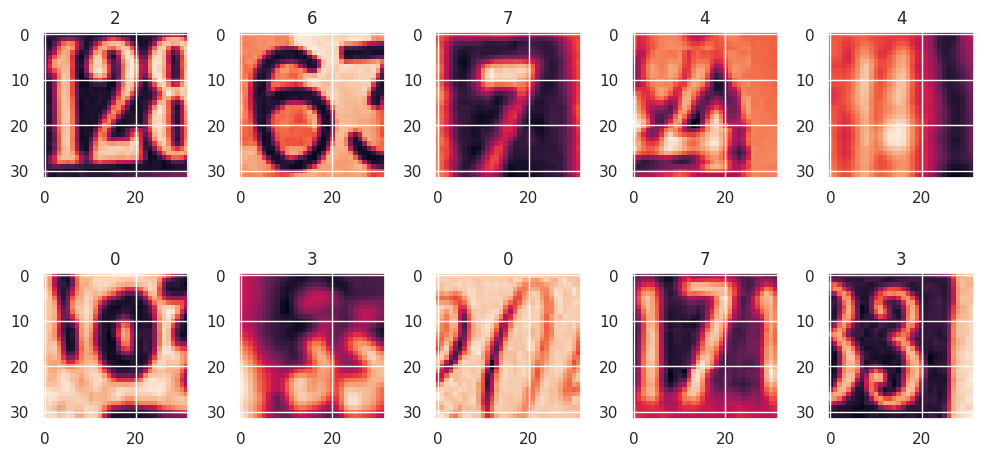

In [ ]:
rows = 2
cols = 5
x = 0

fig = plt.figure(figsize = (10,5))

for i in range(cols):
  for j in range(rows):
    ax = fig.add_subplot(rows, cols, i*rows + j + 1)
    ax.imshow(x_train[x])
    ax.set_title(y_train[x])
    x = x + 1

plt.tight_layout()

plt.show()

## **Data preparation**


In [ ]:
#shape of first image
x_train[0].shape

#single channel 32 x 32 pixels

(32, 32)

In [ ]:
#array of first image
x_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

### **Normalize the train and the test data**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 1024)
x_test = x_test.reshape(x_test.shape[0], 1024)

In [ ]:
x_train= x_train/255
x_test= x_test/255

In [ ]:
x_train[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

Print the shapes of Training and Test data

In [ ]:
x_train.shape

(42000, 1024)

In [ ]:
x_test.shape

(18000, 1024)

### **One-hot encode output**

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train.shape

(42000, 10)

In [ ]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Observation:**

first image: the shape of the first image is 32 by 32 pixels.

normalize: we've converted our 2d image arrays of 32x32 into a 1d image array of 1064 pixels. we also divide the image's pixels by 255 so that each pixel has a value between 0-1.

one-hot: we one-hot encode our target variable which is the y train/test, and as seen above with the shape. we have 42000 data points and which take values from 0-9 (i.e. 10 possible values).

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
import random
np.random.seed(25)
random.seed(25)
tf.random.set_seed(25)

### **Build and train ANN model**

In [ ]:
def nn_model_1():

    model = Sequential()

    model.add(Dense(64, activation = "relu", input_shape = (1024,))) #1 dense layer

    model.add(Dense(32, activation = "relu")) #2 dense layer

    model.add(Dense(10, activation="softmax")) #output layer

    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]) #adam by default has learning_rate of 0.001

    return model

In [ ]:
model_1 = nn_model_1()

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history_model_1 = model_1.fit(x_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

Epoch 1/20
263/263 [==============================] - 6s 11ms/step - loss: 2.2977 - accuracy: 0.1223 - val_loss: 2.2455 - val_accuracy: 0.2114
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.0585 - accuracy: 0.2760 - val_loss: 1.8732 - val_accuracy: 0.3571
Epoch 3/20
263/263 [==============================] - 2s 8ms/step - loss: 1.6943 - accuracy: 0.4273 - val_loss: 1.5807 - val_accuracy: 0.4725
Epoch 4/20
263/263 [==============================] - 2s 7ms/step - loss: 1.5192 - accuracy: 0.4961 - val_loss: 1.4792 - val_accuracy: 0.5089
Epoch 5/20
263/263 [==============================] - 2s 6ms/step - loss: 1.4401 - accuracy: 0.5247 - val_loss: 1.4649 - val_accuracy: 0.5087
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3866 - accuracy: 0.5471 - val_loss: 1.3516 - val_accuracy: 0.5683
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3446 - accuracy: 0.5711 - val_loss: 1.3260 - val_accuracy: 0.5812
Epoch

### **Training and Validation Accuracies**

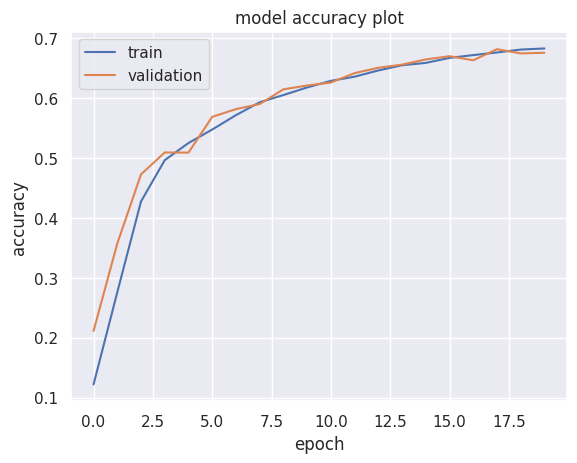

In [ ]:
plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])

plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

**Observations:**

- model's accuracy on the train and validation set gets to about 68% which could be improved.
- overall we can say that the model is giving a generalized performance since the model has done just as well with the validation data as it did with the training data.
- the validation set starts off with a higher accuracy which could be for various reasons: size of the validation set isnt big enough and/or imbalanced data in the validation set.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

In [ ]:
backend.clear_session()

In [ ]:
np.random.seed(25)
random.seed(25)
tf.random.set_seed(25)

### **New ANN model**

In [ ]:
def nn_model_2():

    model = Sequential()

    model.add(Dense(256, activation = "relu", input_shape = (1024,))) #1 dense layer

    model.add(Dense(128, activation = "relu")) #2 dense layer

    model.add(Dropout(0.2)) #dropout layer

    model.add(Dense(64, activation = "relu")) #3 layer

    model.add(Dense(64, activation = "relu")) # 4 layer

    model.add(Dense(32, activation = "relu"))

    model.add(BatchNormalization()) #batch normalization layer

    model.add(Dense(10, activation="softmax")) #output layer

    model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005), metrics = ["accuracy"])

    return model

In [ ]:
model_2 = nn_model_2()
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [ ]:
%%time
history_model_2 = model_2.fit(x_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Epoch 1/30
263/263 [==============================] - 6s 7ms/step - loss: 2.3214 - accuracy: 0.1028 - val_loss: 2.3092 - val_accuracy: 0.0989
Epoch 2/30
263/263 [==============================] - 2s 6ms/step - loss: 2.3052 - accuracy: 0.0998 - val_loss: 2.3050 - val_accuracy: 0.0970
Epoch 3/30
263/263 [==============================] - 2s 8ms/step - loss: 2.3026 - accuracy: 0.1039 - val_loss: 2.2984 - val_accuracy: 0.1188
Epoch 4/30
263/263 [==============================] - 2s 8ms/step - loss: 2.2288 - accuracy: 0.1451 - val_loss: 2.2400 - val_accuracy: 0.1680
Epoch 5/30
263/263 [==============================] - 1s 6ms/step - loss: 2.0521 - accuracy: 0.1952 - val_loss: 2.1720 - val_accuracy: 0.1561
Epoch 6/30
263/263 [==============================] - 2s 6ms/step - loss: 1.8776 - accuracy: 0.2966 - val_loss: 1.7872 - val_accuracy: 0.3796
Epoch 7/30
263/263 [==============================] - 2s 6ms/step - loss: 1.5862 - accuracy: 0.4496 - val_loss: 1.3894 - val_accuracy: 0.5371
Epoch 

### **Training and Validation Accuracies**

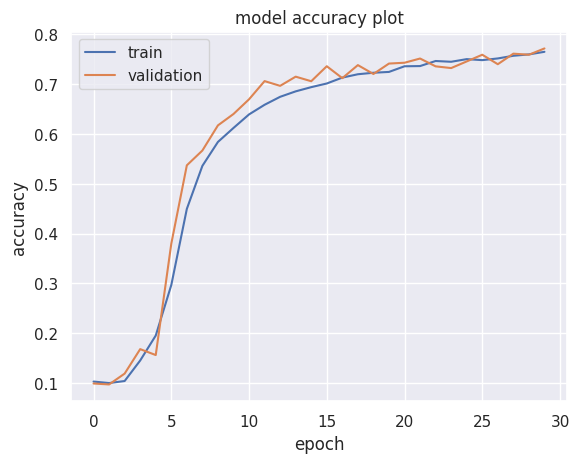

In [ ]:
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])

plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

**Observations:**

- the accuracy on both the training and validation data has increased by 10% sitting at 76% and 77% respectively -- it is looking very promising now.
- this model also gives a generalized performance.
- we still see that the validation data has a higher accuracy between epochs 3 and 16, which could be for the reasons mentioned in the previous observations of our first model.

## **Predictions on the test data**

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
#making predictions on the test data
y_pred_test = model_2.predict(x_test)

#converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

#converting y_test encoded back to class labels
y_test = np.argmax(y_test, axis=1)

# Calculating the probability of the predicted class
#y_pred_test_max_probas = np.max(y_pred_test, axis = 1)

563/563 [==============================] - 1s 2ms/step


In [ ]:
y_pred_test_classes

array([8, 2, 2, ..., 7, 9, 2])

### **Classification report and the confusion matrix for the test predictions**

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred_test_classes))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1814
           1       0.71      0.85      0.77      1828
           2       0.80      0.76      0.78      1803
           3       0.65      0.78      0.71      1719
           4       0.76      0.85      0.80      1812
           5       0.77      0.70      0.73      1768
           6       0.85      0.72      0.78      1832
           7       0.76      0.85      0.80      1808
           8       0.79      0.70      0.74      1812
           9       0.80      0.72      0.75      1804

    accuracy                           0.77     18000
   macro avg       0.78      0.77      0.77     18000
weighted avg       0.78      0.77      0.77     18000



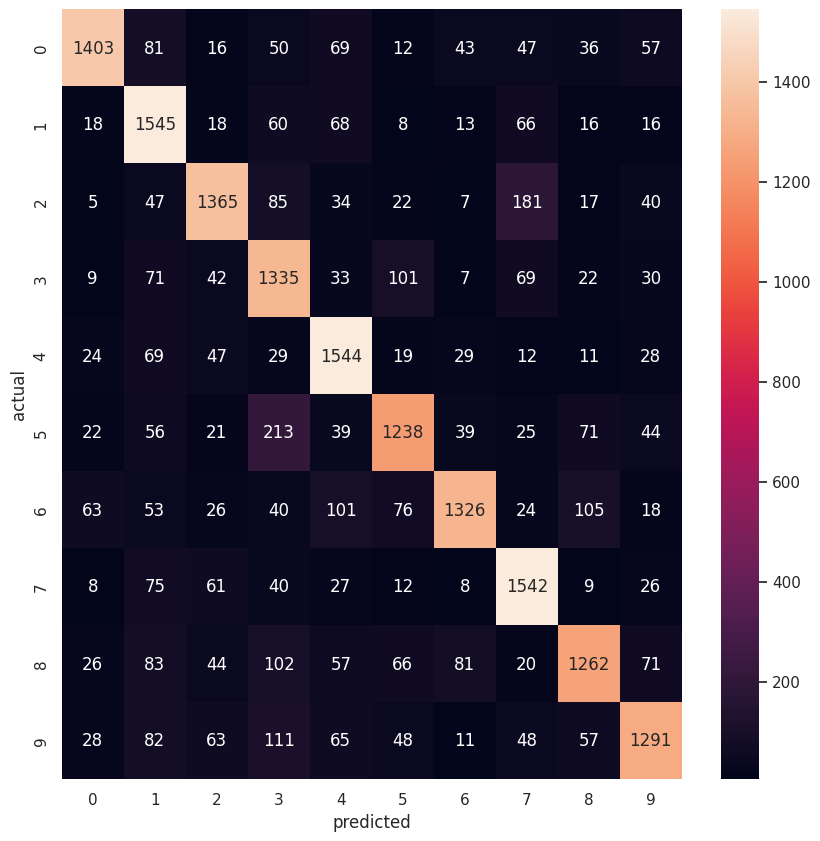

In [ ]:
matrix = confusion_matrix(y_test, y_pred_test_classes)

plt.figure(figsize=(10,10))

sns.heatmap(matrix, annot =True, fmt= '.0f')
plt.ylabel('actual')
plt.xlabel('predicted')

plt.show()

**Final Observations:**
- the model is giving about 77% accuracy on the validation data which is similar to the test data which means that our model is giving generalized performance.
- the models has the highest precision with class 0 and lowest with classe 3 which implies it does a good job at distinguishing number 0 and not so well with number 3.
- the recall range goes from 70% to 85% which implies that the model does well at identifying certain classes but poorly with others.
- the model confuses the most the number 5 with the number 3, followed by confusing the number 2 as number 7, the number 9 with the number 3, and the number 8 as number 3 as well.
- the model identifies the numbers 1, 4, and 7 correctly the most often, and wrongly identifies the numbers 5, 8, 9 the most often.

## **Using Convolutional Neural Networks**

In [ ]:
path = "/content/drive/MyDrive/SVHN_single_grey1.h5"
data = h5py.File(path, 'r')

x_train = data['X_train'][:]
y_train = data['y_train'][:]

x_test = data['X_test'][:]
y_test = data['y_test'][:]

data.close()

In [ ]:
x_train.shape, x_test.shape

((42000, 32, 32), (18000, 32, 32))

## **Data preparation**

In [ ]:
x_train[0].shape, x_train[0]

((32, 32),
 array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
       dtype=float32))

Reshape the dataset to be able to pass them to CNNs

In [ ]:
x_train.shape[0]

42000

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0],32,32,1)

Normalize inputs from 0-255 to 0-1

In [ ]:
x_train = x_train/255
x_test = x_test/255

Print New shape of Training and Test

In [ ]:
x_train.shape, x_test.shape

((42000, 32, 32, 1), (18000, 32, 32, 1))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

**Observation:**

- the only difference so far here is the shape of our x_train and x_test since CNNs require a 4D array

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [ ]:
backend.clear_session()

In [ ]:
np.random.seed(25)
random.seed(25)
tf.random.set_seed(25)

### **Build and train CNN model**

In [ ]:
def cnn_model_1():

    model = Sequential()

    model.add(Conv2D(filters = 16, kernel_size = (3,3), padding='same', input_shape = (32, 32, 1))) #1 layer

    model.add(LeakyReLU(0.1)) #2 layer

    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same')) #3 layer

    model.add(LeakyReLU(0.1)) #4 layer

    model.add(MaxPooling2D(pool_size=(2,2))) #5 layer

    model.add(Flatten()) #6 layer

    model.add(Dense(32)) #7 layer

    model.add(LeakyReLU(0.1)) #8 layer

    model.add(Dense(10, activation = 'softmax')) #9 layer

    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]) #adam by default has learning_rate of 0.001

    return model

In [ ]:
cnn_1 = cnn_model_1()
cnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
#Fit the model on the training data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20. Store the model building history to use later for visualization.
%%time
history_cnn_1 = cnn_1.fit(x_train, y_train, epochs = 20, validation_split = 0.2, batch_size = 32, verbose = 1)

Epoch 1/20
1050/1050 [==============================] - 9s 7ms/step - loss: 1.0858 - accuracy: 0.6513 - val_loss: 0.6137 - val_accuracy: 0.8287
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.5438 - accuracy: 0.8435 - val_loss: 0.5154 - val_accuracy: 0.8549
Epoch 3/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.4387 - accuracy: 0.8730 - val_loss: 0.4598 - val_accuracy: 0.8686
Epoch 4/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3783 - accuracy: 0.8885 - val_loss: 0.4594 - val_accuracy: 0.8718
Epoch 5/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3334 - accuracy: 0.9006 - val_loss: 0.4557 - val_accuracy: 0.8721
Epoch 6/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2965 - accuracy: 0.9117 - val_loss: 0.4654 - val_accuracy: 0.8730
Epoch 7/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2662 - accuracy: 0.9200 - val_loss: 0.4488 - val_accuracy:

### **Training and Validation Accuracies**

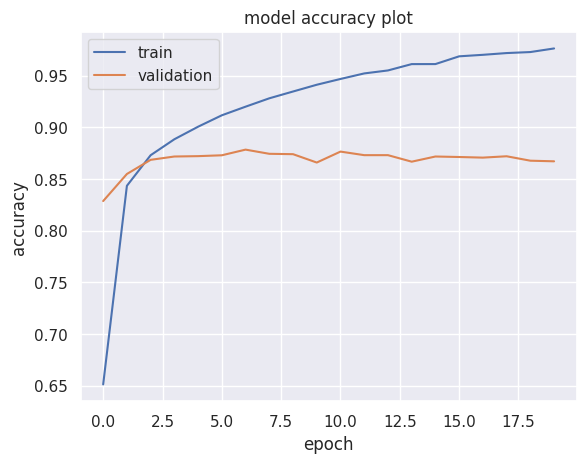

In [ ]:
plt.plot(history_cnn_1.history['accuracy'])
plt.plot(history_cnn_1.history['val_accuracy'])

plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

**Observations:**

- our model has done well with the training data getting up to 97% accuracy by the 20th epoch, but has done relatively poorly with our validation data.
- the validation accuracy has become pretty much constant at ~86% after 3 epochs
- we can say that our model is overfitting the training data

In [ ]:
backend.clear_session()
np.random.seed(25)
random.seed(25)
tf.random.set_seed(25)

### **Second CNN model**

In [ ]:
def cnn_model_2():

    model = Sequential()

    model.add(Conv2D(filters = 16, kernel_size = (3,3), padding='same', input_shape = (32, 32, 1))) #1 layer -- conv1

    model.add(LeakyReLU(0.1)) #2 layer

    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same')) #3 layer -- conv2

    model.add(LeakyReLU(0.1)) #4 layer

    model.add(MaxPooling2D(pool_size=(2,2))) #5 layer

    model.add(BatchNormalization()) #6 layer

    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same')) #7 layer -- conv3

    model.add(LeakyReLU(0.1)) #8 layer

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same')) #9 layer -- conv4

    model.add(LeakyReLU(0.1)) #10 layer

    model.add(MaxPooling2D(pool_size=(2,2))) #11 layer

    model.add(BatchNormalization()) #12 layer

    model.add(Flatten()) #13 layer

    model.add(Dense(32)) #14 layer

    model.add(LeakyReLU(0.1)) #15 layer

    model.add(Dropout(0.5)) #16 layer

    model.add(Dense(10, activation = 'softmax')) #17 layer

    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]) #adam by default has learning_rate of 0.001

    return model

### **Training and Validation accuracies**

In [ ]:
cnn_2 = cnn_model_2()
cnn_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
%%time
history_cnn_2 = cnn_2.fit(x_train, y_train, epochs = 30, validation_split = 0.2, batch_size = 128, verbose = 1)

Epoch 1/30
263/263 [==============================] - 8s 13ms/step - loss: 1.3751 - accuracy: 0.5348 - val_loss: 1.9817 - val_accuracy: 0.2927
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 0.6811 - accuracy: 0.7922 - val_loss: 0.6778 - val_accuracy: 0.8067
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 0.5603 - accuracy: 0.8287 - val_loss: 0.4641 - val_accuracy: 0.8676
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4913 - accuracy: 0.8508 - val_loss: 0.4272 - val_accuracy: 0.8860
Epoch 5/30
263/263 [==============================] - 3s 11ms/step - loss: 0.4426 - accuracy: 0.8674 - val_loss: 0.3903 - val_accuracy: 0.8917
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4036 - accuracy: 0.8757 - val_loss: 0.4315 - val_accuracy: 0.8823
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 0.3715 - accuracy: 0.8860 - val_loss: 0.3914 - val_accuracy: 0.8963
E

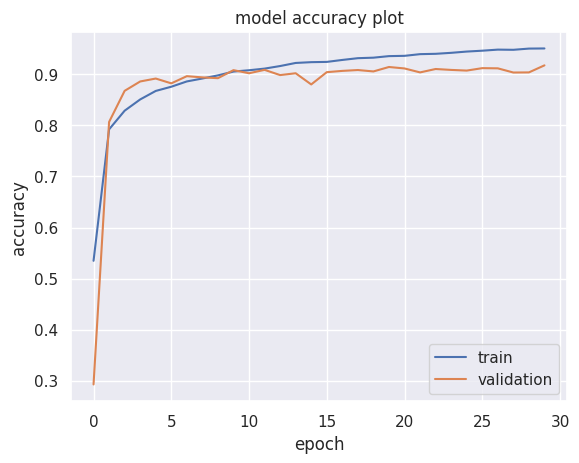

In [ ]:
plt.plot(history_cnn_2.history['accuracy'])
plt.plot(history_cnn_2.history['val_accuracy'])

plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

**Observations:**

- this model has improved on our first model where the validation data accuracy has improved by 6 percent points (~86% to 92%)
- the model has a generalized performance where the accuracy for both the training data and validation data are similar
- the validation data accuracy is higher than the training data between epochs 2-8 which could be due to imbalanced data or a small validation data set.
- by the last epoch the training data accuracy is 95% and the validation data accuracy is 91%
- this model looks very promising, and it is the best one so far

## **Predictions on the test data**

### **Predictions on the test data using the second CNN model**

In [ ]:
#making predictions on the test data
y_pred_test = cnn_2.predict(x_test)

#converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

#converting y_test encoded back to class labels
y_test = np.argmax(y_test, axis=1)


563/563 [==============================] - 2s 3ms/step


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1814
           1       0.89      0.93      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.89      0.90      0.90      1719
           4       0.93      0.94      0.93      1812
           5       0.93      0.91      0.92      1768
           6       0.92      0.90      0.91      1832
           7       0.94      0.93      0.94      1808
           8       0.91      0.91      0.91      1812
           9       0.91      0.92      0.91      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



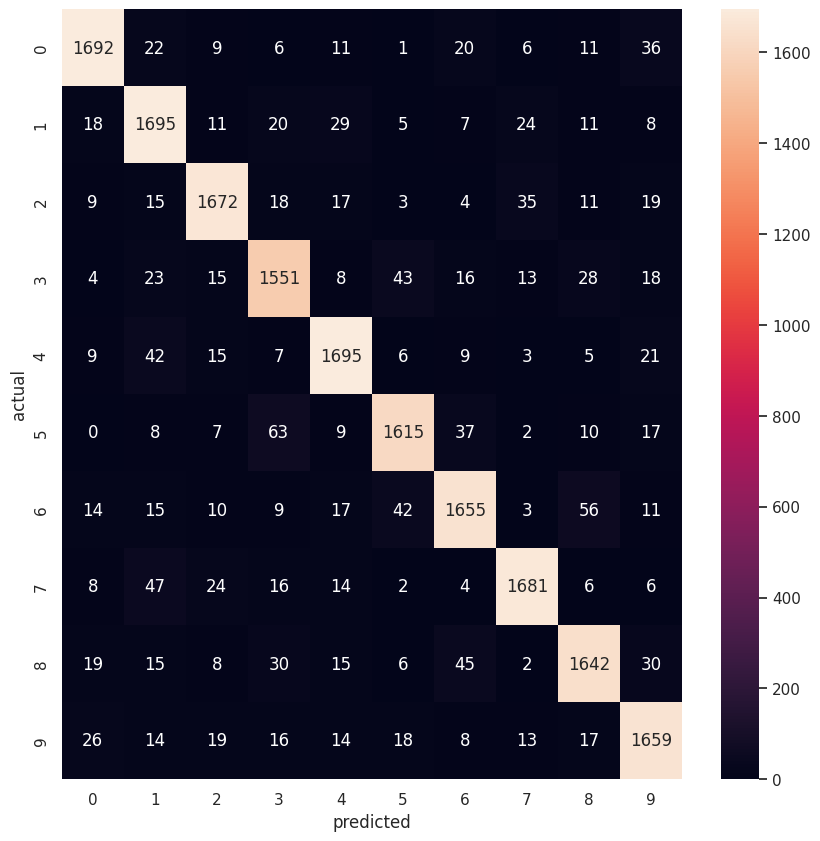

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred_test_classes))

matrix = confusion_matrix(y_test, y_pred_test_classes)

plt.figure(figsize=(10,10))

sns.heatmap(matrix, annot =True, fmt= '.0f')
plt.ylabel('actual')
plt.xlabel('predicted')

plt.show()

### **Final Observations:**
- the model's accuracy on the test dataset is 92% (similar with our training set) which signifies that our model is giving generalized performance.
- the lowest precision can be found with classes 1 and 3 at 89% accuracy -- this means it struggles the most with distinguishing number 1 and 3.
- the recall range is from 90% to 94% indicating that overall the model does well at predicting all classes which can also be seen by looking at the f1-scores.
- the f1-scores range from 90% to 94% indicating high accuracy levels in our model.
- in the confusion matrix, there are 2 standout cases:
  1. when the number 5 is given our model guessed that it was the number 3, 63 times.
  2. when the number is 6 our model predicted it was a 8, 56 times.
- other than those observations, our model doesnt predict wrongly a given number with another number more than 50 times
- the model identifies the numbers 0, 1, 2, and 4 correctly the most often, and wrongly identifies the numbers 3 and 5 the most often
- to conclude, our second cnn model has outperformed all other models in this case study by a wide margin, and given the points above and that the accuracy, precision and recall all look very good (just about >90% in all cases), i would recommend this second cnn model for use in future digit recognition in new datasets.